In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tslearn as ts

# Time evolution of centers

In [3]:
# plot the clusters centers
import matplotlib.ticker as mtick

def plot_centers(subject, run, sensor, nclusters, file_path, metric='dtw',
                xlim_laying=None, ylim_laying=None, xlim_walking=None, ylim_walking=None):
                
    """
    plot the clusters centers for a given subject, run and nclusters
    """
    data_laying = pd.read_csv('clustering_results_{}/subject_{}/run_{}/laying/sensor_type_{}/{}_clusters.csv'.format(metric, subject, run, sensor, nclusters))
    data_walking = pd.read_csv('clustering_results_{}/subject_{}/run_{}/walking/sensor_type_{}/{}_clusters.csv'.format(metric, subject, run, sensor, nclusters))
         
    sns.set_theme(style="whitegrid", font_scale=1.5, palette='Dark2')
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    LINEWIDTH = 2
    for i in range(nclusters):
        ax[0].plot (data_laying['MILLISEC'], data_laying['center {}'.format(i)], 
            label='center {}'.format(i), linewidth=LINEWIDTH)
        ax[1].plot (data_walking['MILLISEC'], data_walking['centers {}'.format(i)],
            label='center {}'.format(i), linewidth=LINEWIDTH)
    if nclusters>1:ncols = 2
    else:ncols=1
    ax[0].legend( ncol=ncols)
    ax[0].set_title('Laying', fontsize=18)
    ax[1].set_title('Walking', fontsize=18)

    if xlim_laying is not None: ax[0].set_xlim(xlim_laying)
    if ylim_laying is not None: ax[0].set_ylim(ylim_laying)
    ax[0].set_xlabel('Time [ms]')
    ax[0].set_ylabel(r'Signal [$10^{-3}$g]') 

    # ax[1].legend( ncol=ncols)
    if xlim_walking is not None: ax[1].set_xlim(xlim_walking)
    if ylim_walking is not None: ax[1].set_ylim(ylim_walking)
    ax[0].set_ylim(ax[1].get_ylim())
    ax[1].set_xlabel('Time [ms]')
    ax[1].set_ylabel('')
    ax[0].locator_params(axis='x', nbins=5)
    ax[1].locator_params(axis='x', nbins=5)
    fig.subplots_adjust(wspace=0.12)
    ax[1].set_yticklabels([])
    ax[0].ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
    ax[1].ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)

    fig.savefig(file_path, bbox_inches='tight')

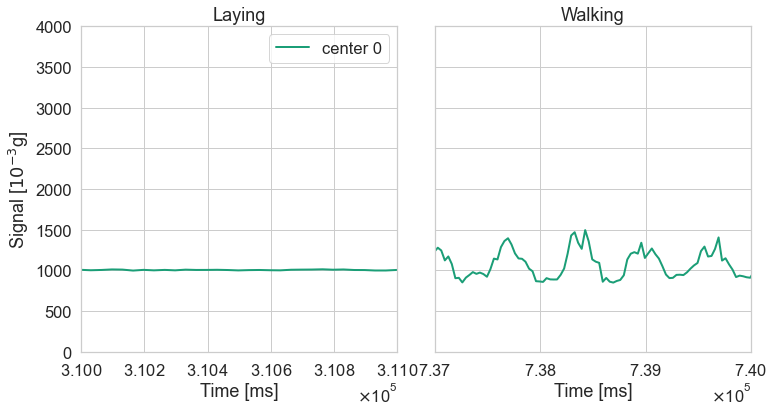

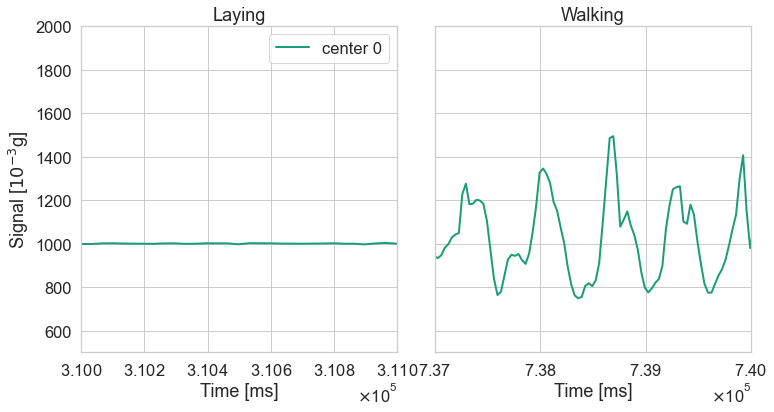

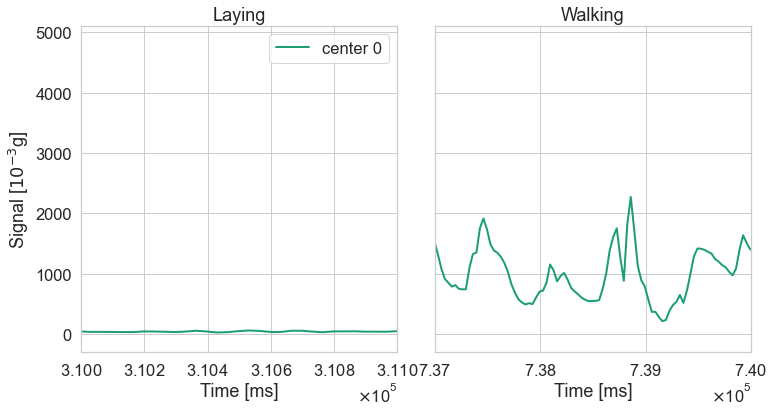

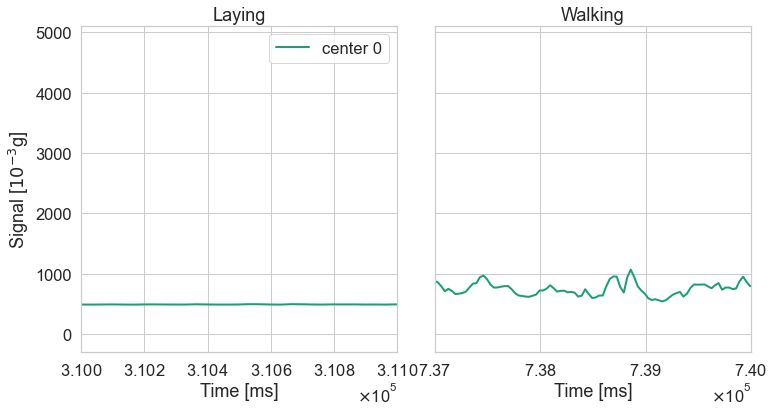

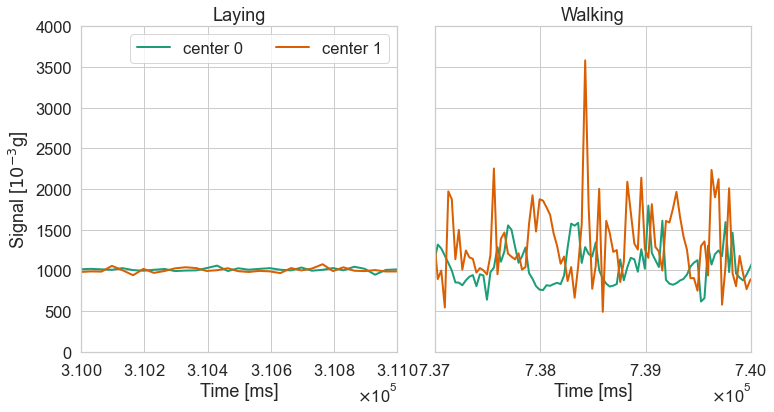

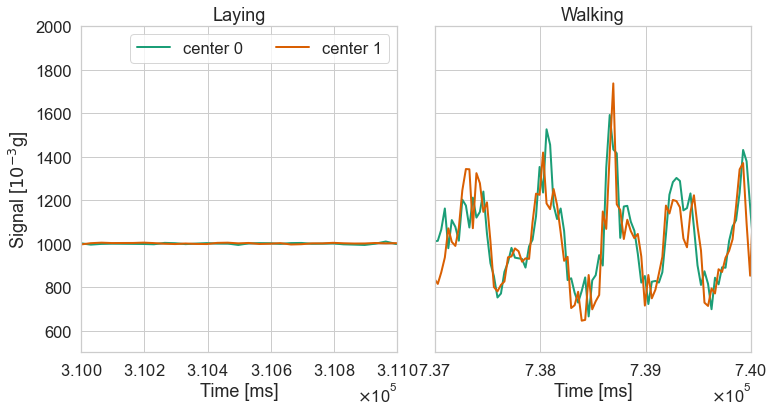

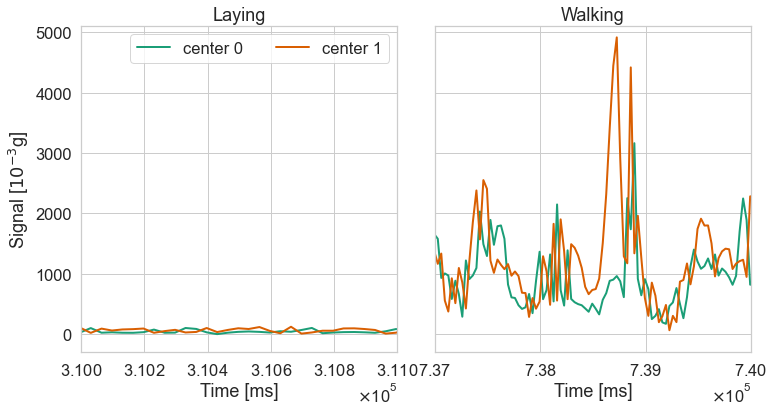

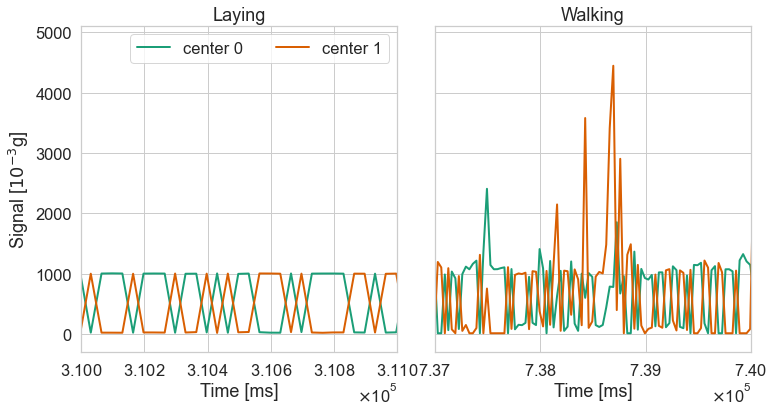

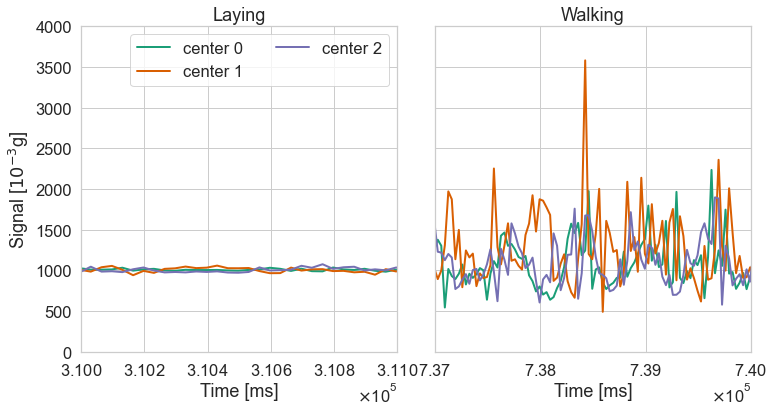

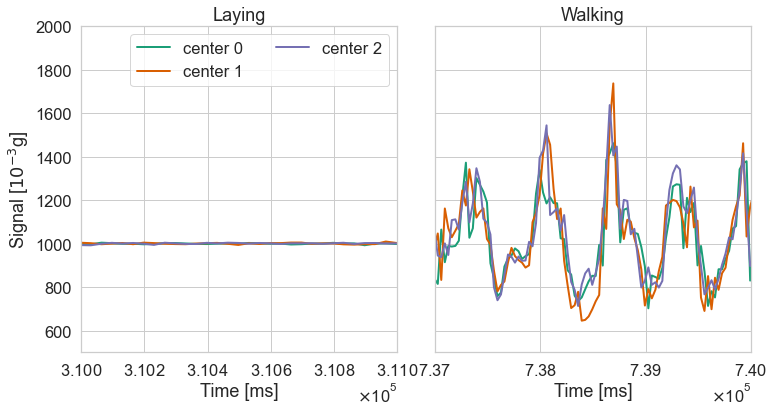

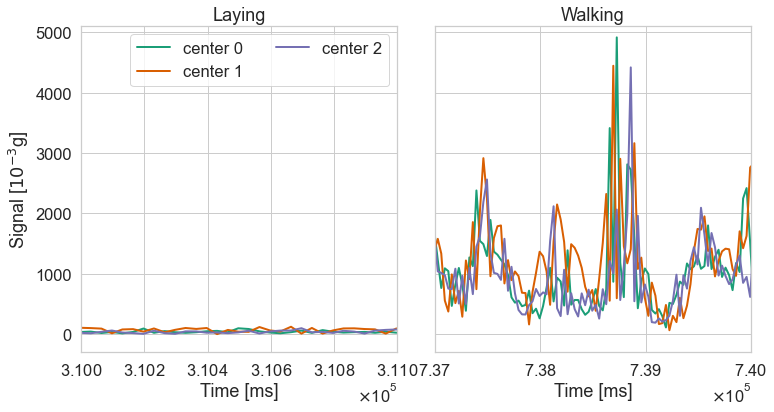

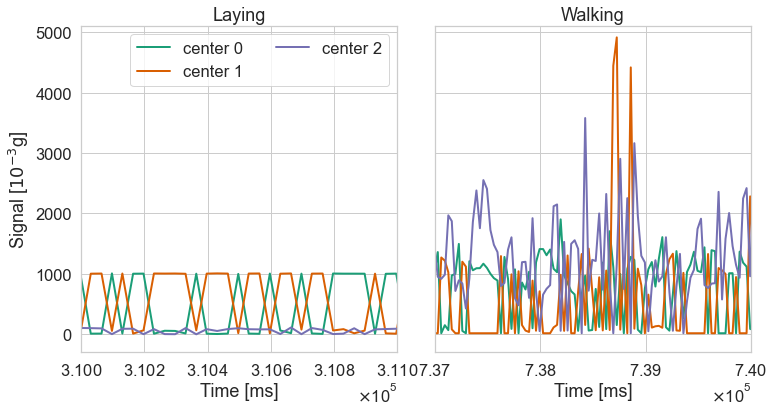

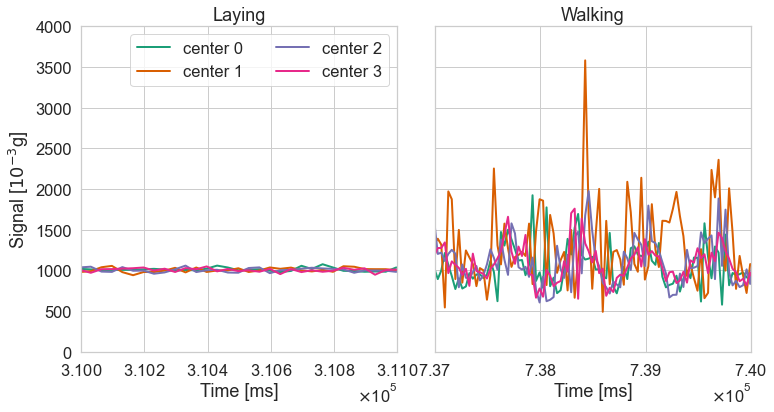

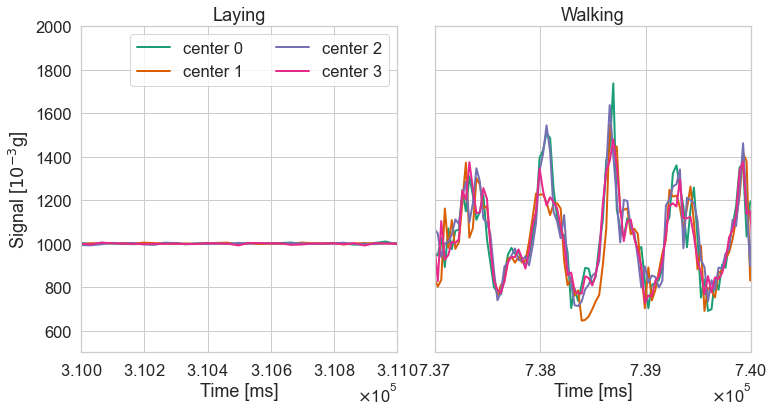

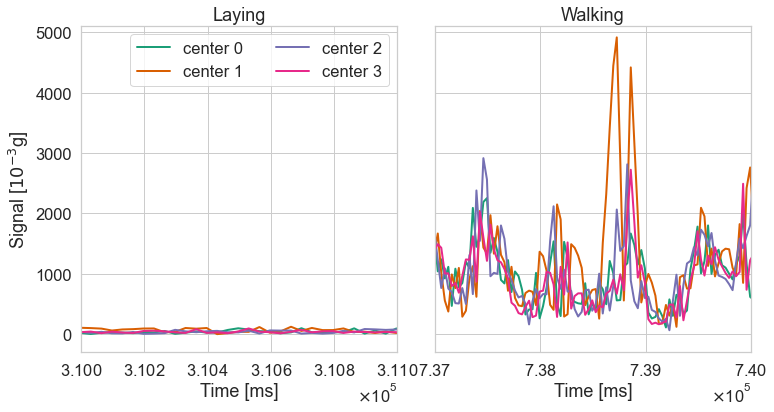

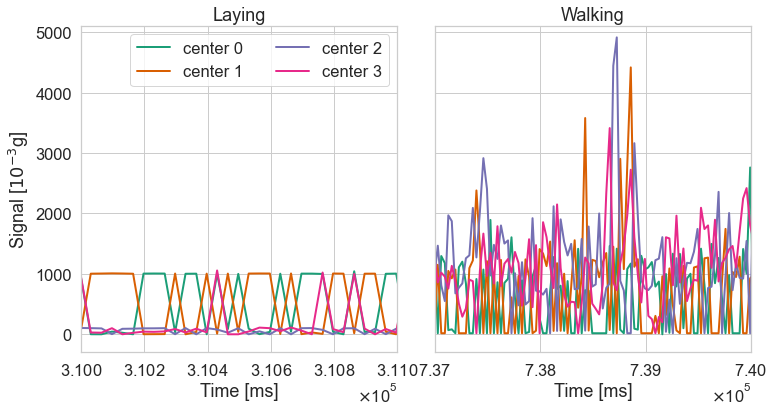

In [7]:
subject = 1
run = 1
metric = 'euclidean'

for c in [1,2,3,4]:
    path = 'clustering_results_{}/subject_{}/run_{}/triaxial_acc_{}_centers.pdf'.format(metric, subject, run, c)
    plot_centers(1, 1, 'triaxial_acc', c, path, metric , (0.31e6, 0.311e6), (800, 1200),(0.737e6, 0.74e6),(-10, 4000)) # subject 1, run 1, sensor triaxial_acc, nclusters 2
    path = 'clustering_results_{}/subject_{}/run_{}/IMU_acc{}_centers.pdf'.format(metric, subject, run, c)
    plot_centers(1, 1, 'IMU_acc', c,path, metric , (0.31e6, 0.311e6), (950, 1050),(0.737e6, 0.74e6),(500, 2000)) # subject 1, run 1, sensor IMU_acc, nclusters 2
    path = 'clustering_results_{}/subject_{}/run_{}/IMU_gyro{}_centers.pdf'.format(metric, subject, run, c)
    plot_centers(1, 1, 'IMU_gyro', c,path, metric ,  (0.31e6, 0.311e6), (-50, 200),(0.737e6, 0.74e6),(-300, 5100)) # subject 1, run 1, sensor IMU_gyro, nclusters 2


## Classification score

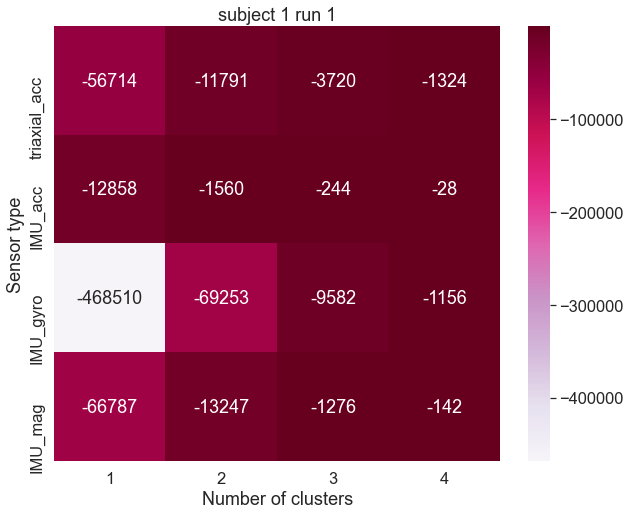

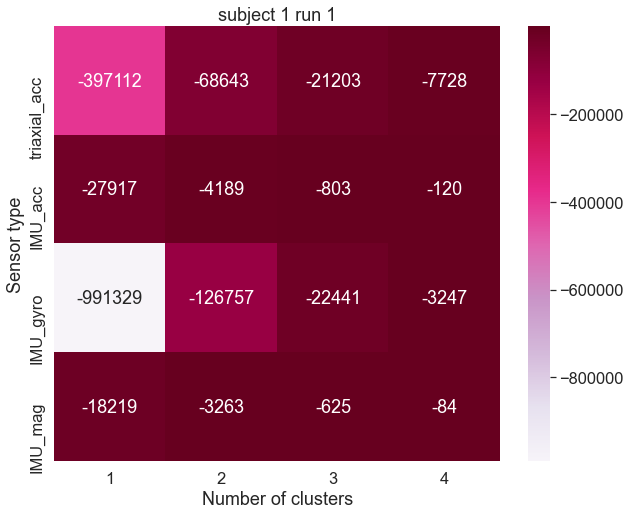

In [114]:
subject = 1
run = 1
metric = 'euclidean'

#for each subject and run draw compute the average score and plot an heatmap: nclusters vs sensor

def plot_heatmap(subject, run, state = 'laying'):
    path = 'clustering_results_{}/subject_{}/run_{}/{}'.format(metric,subject, run, state)
    sensors = ['triaxial_acc', 'IMU_acc', 'IMU_gyro', 'IMU_mag']
    nclusters = [1,2,3,4]
    scores = np.zeros((len(sensors), len(nclusters)))
    for i, sensor in enumerate(sensors):
        for j, ncluster in enumerate(nclusters):
            scores[i,j] = np.mean(pd.read_csv('{}/sensor_type_{}/{}_clusters.csv'.format(path, sensor, ncluster))['score'])
    sns.set_theme(style="white", font_scale=1.5, palette='Dark2')
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    sns.heatmap(scores, annot=True, fmt='.0f', cmap='PuRd', ax=ax)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Sensor type')
    ax.set_title('subject {} run {}'.format(subject, run))
    ax.set_xticklabels(nclusters)
    ax.set_yticklabels(sensors)

plot_heatmap(subject, run, 'laying')
plot_heatmap(subject, run, 'walking')

## Ratio of amplitude

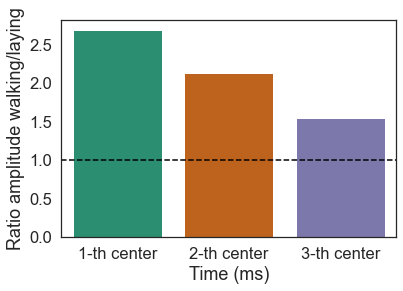

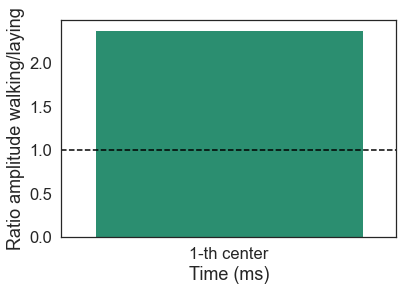

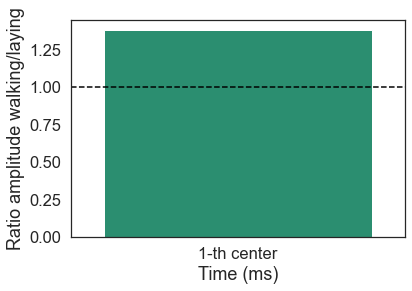

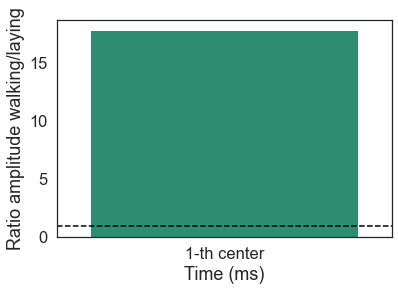

In [10]:
# average amplitude laying vs walking
def plot_average_amplitude(subject, run, sensor, ncluster, metric):
    pathlaying = 'clustering_results_{}/subject_{}/run_{}/laying/sensor_type_{}/{}_clusters.csv'.format(metric,subject, run, sensor, ncluster)
    pathwalking = 'clustering_results_{}/subject_{}/run_{}/walking/sensor_type_{}/{}_clusters.csv'.format(metric,subject, run, sensor, ncluster)
    datalaying = pd.read_csv(pathlaying)
    datawalking = pd.read_csv(pathwalking)

    fig, ax = plt.subplots(1, 1, figsize=(6, 4))

    amplitude_walking  = [np.max(datawalking['centers {}'.format(c)])-np.min(datawalking['centers {}'.format(c)]) for c in range(ncluster)]
    amplitude_laying = [np.max(datalaying['center {}'.format(c)])-np.min(datalaying['center {}'.format(c)]) for c in range(ncluster)]
    amplitude_ratio = [b/a for a,b in zip(amplitude_laying, amplitude_walking)]
        
    sns.barplot(x =['{}-th center'.format(c) for c in range(1,ncluster+1)], y = amplitude_ratio, ax=ax)
    # ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Ratio amplitude walking/laying')
    ax.axhline(1, color='black', linestyle='--')


plot_average_amplitude(subject, run, 'triaxial_acc', 3, metric)
plot_average_amplitude(subject, run, 'IMU_acc', 1, metric)
plot_average_amplitude(subject, run, 'IMU_gyro', 1, metric)
plot_average_amplitude(subject, run, 'IMU_mag', 1, metric)

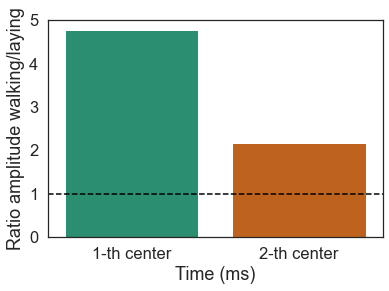

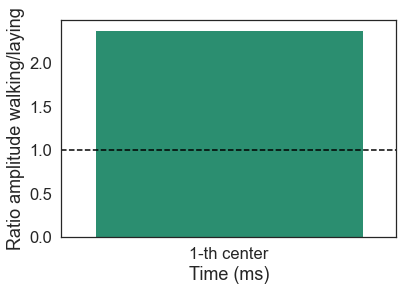

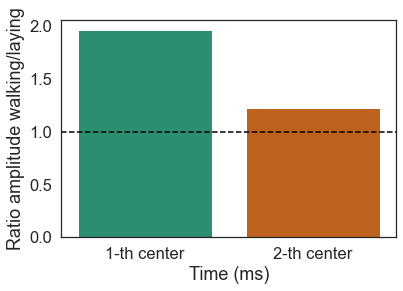

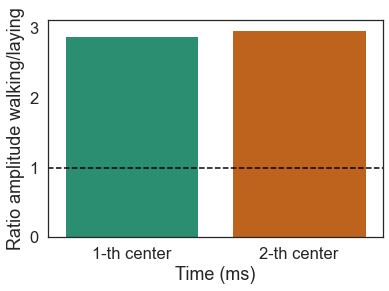

In [7]:
plot_average_amplitude(subject, run, 'triaxial_acc', 2, metric)
plot_average_amplitude(subject, run, 'IMU_acc', 1, metric)
plot_average_amplitude(subject, run, 'IMU_gyro', 2, metric)
plot_average_amplitude(subject, run, 'IMU_mag', 2, metric)

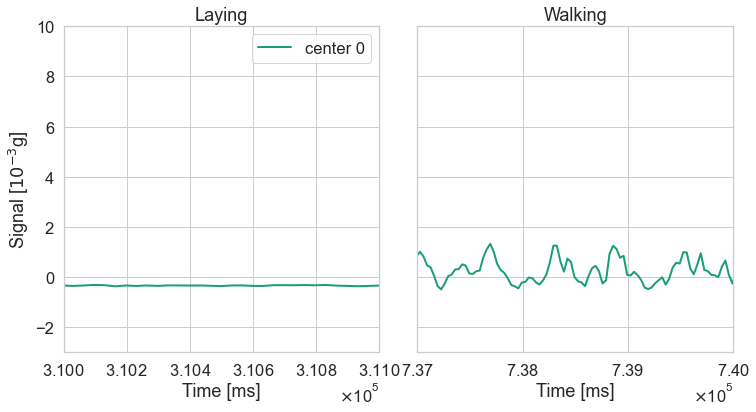

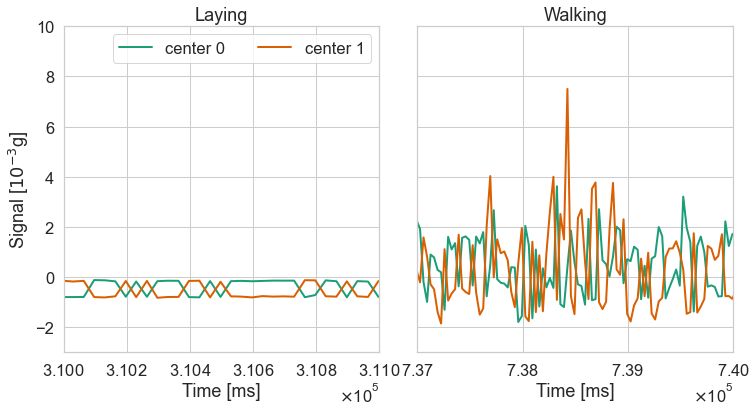

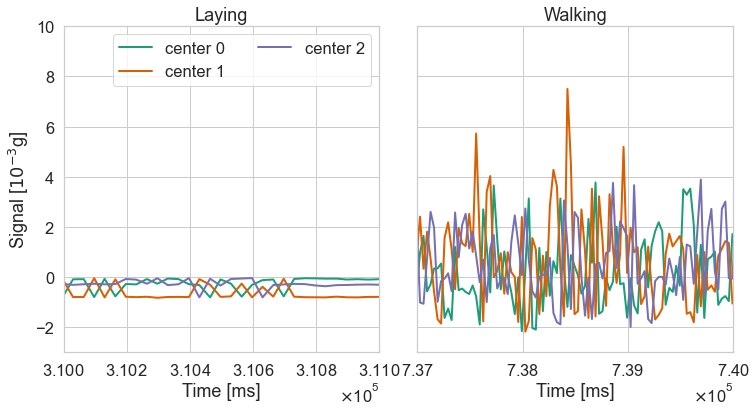

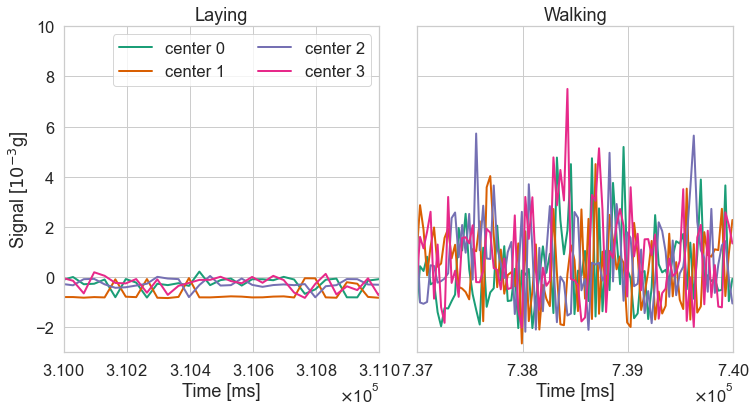

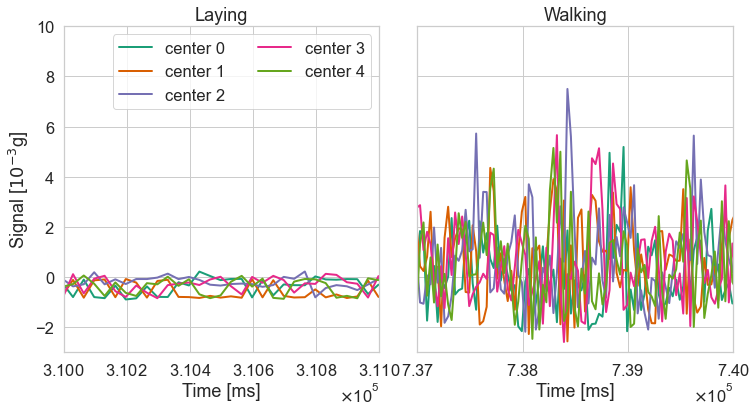

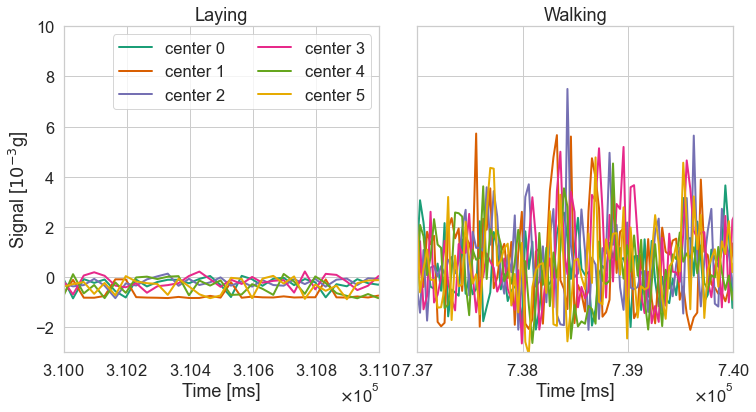

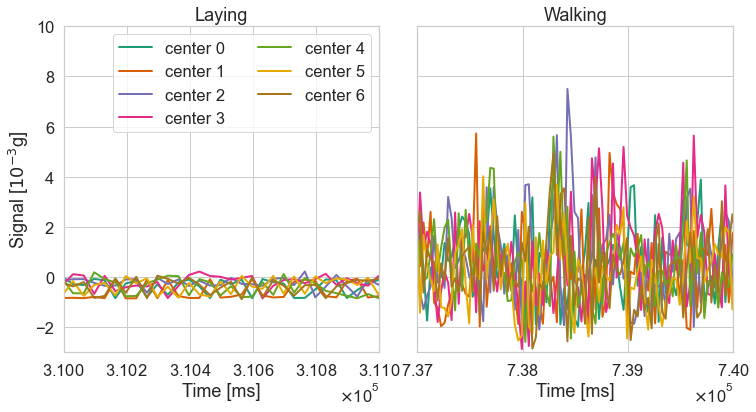

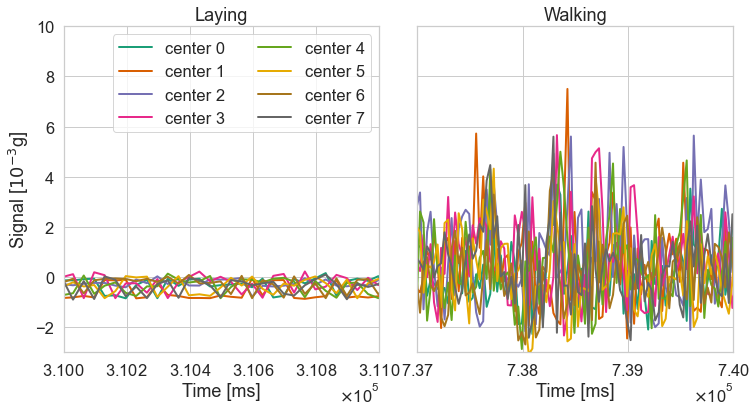

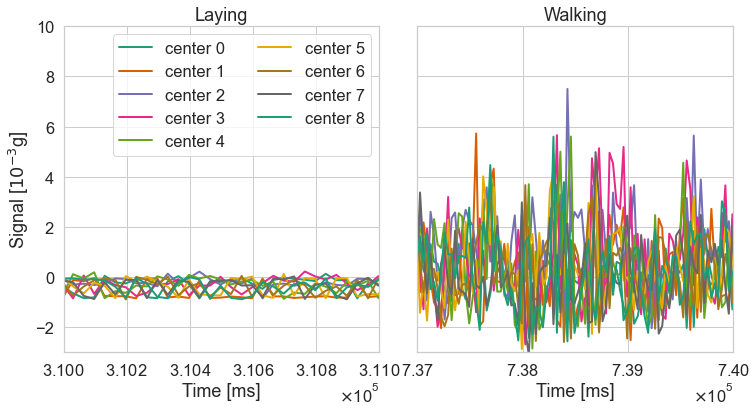

In [18]:
for c in [1,2,3,4,5,6,7,8,9]:
    path = 'clustering_results_{}/subject_{}/run_{}/all{}_centers.pdf'.format(metric, subject, run, c)
    plot_centers(1, 1, 'all', c, path, metric,(0.31e6, 0.311e6), (-1, 1),(0.737e6, 0.74e6),(-3, 10)) # subject 1, run 1, sensor all